## What are word embeddings ?



Word embedding is a language modelling technique, to create dense vector representation of words in a corpus, in such a way that relates to the meaning of the words, i.e. similar words would be related to each other. For example, apple, orange and mango can be related to each other as they belong to the category of fruits, whereas man, woman, people can be related to each other in another group. Word embedding is a technique of representing such relationships numerically in vector form.
</br></br>
Lets first dicuss a simpler model, where every word in the corpus, is represented by a one-hot vector. For example, in a text corpus of 1000 words, every word will be represented by a 1000 dimensional vector, where the position of that word in the dictionary(collection of all unique words in the corpus) is marked as 1, and the remaining positions are 0.

apple -> $\begin {bmatrix} 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 &  ... & 1 & ... & 0 & 0 & 0 & 0 & 0 \end {bmatrix}$

orange -> $\begin {bmatrix} 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & ... & 1 & ... & 0 & 0 & 0 & 0 \end {bmatrix}$

mango -> $\begin {bmatrix} 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & ... & 1 & ...  & 0 & 0 & 0 \end {bmatrix}$

and so on...

The problem with this type of representation is that this is a very sparse representation (only one 1 in each row of 1000 vectors and remaining are 0). This is a wastage of space and also increases algorithm complexity.
</br></br>

Word embeddings work by using an algorithm to train a set of fixed-length dense and continuous-valued vectors based on a large corpus of text. Each word is represented by a point in the embedding space and these points are learned and moved around based on the words that surround the target word. Here every word is represented as a n-dimensional dense vector of floating point values. It can also be thought of a "lookup table". After these weights i.e. the embedding matrix have been learned, each word can be encoded by looking up the dense vector it corresponds to in the table.

Eg. A 5 dimensional word embedding:

apple -> $\begin {bmatrix} 0.21 & 0.35 & -0.04 & 0.19 & 0.78 \end {bmatrix}$

orange -> $\begin {bmatrix} 0.34 & 0.50 & 0.02 & 0.12 & 0.91 \end {bmatrix}$

mango -> $\begin {bmatrix} 0.33 & 0.46 & -0.1 & 0.17 & 0.87 \end {bmatrix}$

&nbsp;&nbsp;... &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ...
</br></br>
The embedding matrix is learned using various machine learning algorithms. It is known as an embedding matrix, since every point representing a word is embedded somewhere in the matrix.

# Application of Word Emebddings

- ### **Find similar words**: It can be used to find words with similar meaning for a particular word. For example. apple can be suggested as similar word for orange, as both belong to the fruits category.

- ### **Predict next word in a sentence**: For example, if in the corpus, there exists a sentence "I like orange juice", and the word embedding learns that orange and apple are related (belong to fruits category). Now, if presented with "I like apple _____" it can suggest juice as the next word in the sentence.

- ### **Create group of related words**: It can be used for grouping semantically similar words. This is also applicable for seggregation of different groups i.e. words with different meaning would be grouped away from each other.

- ### **Feature for text classification**: Text is mapped into arrays of vectors which is fed to the model for training as well as prediction. Text-based classifier models cannot be trained on the string, so this will convert the text into machine trainable form. Further its features of building semantic help in text-based classification.

- ### **Document clustering**: This is a process where a set of documments are grouped/clusterd based on the similarity of their contents. Word embeddings is widely used for this process as well.

- ### **Natural language processing**: There are many applications whereword embedding is useful and wins over feature extraction phases such as parts of speech tagging, sentimental analysis, and syntactic analysis.

# How to use word embeddings ?

We can either generate our own custom word embeddings, or use pre-trained word embedding models such as Word2Vec or GloVe

## Generate your own word embeddings

In word embedding technique, similar words have similar meanings. An embedding is a dense vector of floating point values. The length 'n' of the vector can be specified and is a hyperparameter. Instead of specifying the values for the embedding manually, they are trainable parameters i.e. weights learned by the model during training. A higher dimensional embedding can capture fine-grained relationships between words, but takes more data to learn.

Lets start by importing the necessary libraries.
</br>
We would be using the following libraries:
- keras module inside tensorflow library to train our embedding matrix
- numpy library for performing arithmetic operations on matrix
- nltk library for preprocessing of text corpus
- os module for performing OS specific tasks

In [1]:
import os
import nltk
import numpy as np
import pandas as pd
import tensorflow as tf

from nltk.tokenize import word_tokenize

from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from tensorflow.keras.callbacks import EarlyStopping

Here, we have used a dataset consisting of user reviews given for a restaurant. You can get the dataset from [here](https://www.kaggle.com/hj5992/restaurantreviews/version/1). Download the dataset and keep it in the same directory or change the path while loading the dataset below.
</br></br>
First, let us import the dataset using pandas and view it.

In [2]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t')
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


Now, we form a list of the reviews (our text corpus) and corresponding labels(1 for positive or 0 for negative) mentioned in the dataset

In [3]:
corpus = list(dataset["Review"])
labels = np.array(dataset["Liked"])

We would be requiring the 'punkt' resource in NLTK. Download it if not available as shown below.

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Now, we find the total number of unique words in our corpus, so that we can decide what should be our vocabulary size.

In [6]:
all_words = set()
for line in corpus:
    tokenize_word = word_tokenize(line)
    for word in tokenize_word:
        all_words.add(word)

vocab_size = len(all_words)
print('Vocabulary Size: ', vocab_size)

Vocabulary Size:  2356


The Embedding layer expects the words to be in numeric form. Therefore, we need to convert the sentences in our corpus to numbers. One way to convert text to numbers is by using the one_hot function from the keras.preprocessing.text library. The function takes sentence and the total length of the vocabulary and returns the sentence in numeric form.

In [7]:
embedded_reviews = [one_hot(review, vocab_size) for review in corpus]

# viewing one-hot encoded vectors for the first 5 reviews
print(embedded_reviews[0:5])

[[1040, 1297, 1146, 841], [493, 1324, 507, 152], [507, 206, 2096, 927, 1561, 270, 1164, 1800], [320, 1902, 1993, 927, 23, 1313, 324, 1058, 866, 1542, 1731, 1791, 2096, 1297, 2291], [927, 790, 2022, 927, 576, 270, 508, 2096, 1273, 673, 927, 1991]]


The embedding layer expects sentences to be of equal size. However, our encoded sentences are of different sizes. One way to make all the sentences of uniform size is to increase the lenght of all the sentences and make it equal to the length of the largest sentence.

To do so, we first find the length of the longest review in our corpus, and pad the remainng ones with zeroes at the end.

In [8]:
word_count = lambda review: len(word_tokenize(review))
longest_review = max(corpus, key=word_count)
longest_review_length = len(word_tokenize(longest_review))

padded_reviews = pad_sequences(embedded_reviews, longest_review_length, padding='post')
print(padded_reviews)

[[1040 1297 1146 ...    0    0    0]
 [ 493 1324  507 ...    0    0    0]
 [ 507  206 2096 ...    0    0    0]
 ...
 [1542 2130  270 ...    0    0    0]
 [ 927 1276 1537 ...    0    0    0]
 [1841 1022  240 ...    0    0    0]]


Now, we are ready to create a very simple text classification model with an embedding layer as the input layer. We are using the `Sequential` model from the keras library, to build our model.

The dimension of the embedding matrix can be specified and is a hyperparameter (here we take it as `512`). Instead of specifying the values for the embedding manually, they are trainable parameters i.e. weights learned by the model during training. A higher dimensional embedding can capture fine-grained relationships between words, but takes more data to learn.

In [9]:
embedding_dimension = 512

model = Sequential()
model.add(Embedding(vocab_size, embedding_dimension, input_length=longest_review_length))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 512)           1206272   
_________________________________________________________________
flatten (Flatten)            (None, 17408)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2228352   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 3,442,945
Trainable params: 3,442,945
Non-trainable params: 0
_________________________________________________________________
None


Now let's train the model on our data using the `fit` method, as shown below. Here, we have ran the training process for 20 iterations (epochs), with `EarlyStopping` added. The role of early stopping is to stop the training process earlier than the specified epoch if the monitored parameter does not change for a specified no of epochs (i.e. `patience`). You may find more about EarlyStopping [here](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping). Also we have split our dataset into 2 parts one for training (90%) and the other for validation (10%).

In [10]:
history = model.fit(padded_reviews, labels, epochs=20, verbose=1, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_accuracy', patience=3)])

Epoch 1/20
29/29 [==============================] - 2s 47ms/step - loss: 0.6848 - accuracy: 0.5544 - val_loss: 0.7793 - val_accuracy: 0.1900
Epoch 2/20
29/29 [==============================] - 1s 40ms/step - loss: 0.5654 - accuracy: 0.7689 - val_loss: 0.6669 - val_accuracy: 0.6200
Epoch 3/20
29/29 [==============================] - 1s 36ms/step - loss: 0.2512 - accuracy: 0.9067 - val_loss: 0.8971 - val_accuracy: 0.5000
Epoch 4/20
29/29 [==============================] - 1s 35ms/step - loss: 0.0798 - accuracy: 0.9744 - val_loss: 0.6885 - val_accuracy: 0.7000
Epoch 5/20
29/29 [==============================] - 1s 35ms/step - loss: 0.0139 - accuracy: 0.9989 - val_loss: 0.8990 - val_accuracy: 0.6300
Epoch 6/20
29/29 [==============================] - 1s 36ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.8643 - val_accuracy: 0.6700
Epoch 7/20
29/29 [==============================] - 1s 35ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.7419 - val_accuracy: 0.7200
Epoch 8/20
29

You may find the overall accuracy and loss for the training process.

In [11]:
loss, accuracy = model.evaluate(padded_reviews, labels, verbose=0)
print('Overall Accuracy: %f' % (accuracy*100))
print('Overall Loss: %f' % (loss*100))

Overall Accuracy: 97.100002
Overall Loss: 8.838846


The word embeddings are the weights of the model learned during the training process.

## Use pre-trained word embeddings

Now, we will see how to use pre-trained word embedding models. Several types of pretrained word embeddings exist. Here, we will use the Word2Vec model develoved by Google researchers, and the GloVe model developed by Stanford University researchers.

We will be using the `genisim` library for this. You may install it with the following command.

In [12]:
!pip install gensim==3.6.0

### Word2Vec Model

Word2vec is a shallow two-layered neural network model to produce word embeddings for better word representation. Word2vec represents words in vector space representation.

Word2vec is a combination of models used to represent distributed
representations of words in a corpus C. Word2Vec is an
algorithm that accepts text corpus as an input and outputs a vector
representation for each word.

There are two flavors of word2vec, such as CBOW and Skip-Gram. You can learn more about them [here](https://towardsdatascience.com/nlp-101-word2vec-skip-gram-and-cbow-93512ee24314).

We begin with importing the necessary libraries.

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

We will be using the same dataset here as well. We have already imported it in the previous section. 

Now, we need to tokenize each review into a list of words, before creating a model with them.

In [14]:
word_tokenized_corpus = [ word_tokenize(review) for review in corpus]

We create an instance of the Word2Vec model.

There are many parameters on this constructor; a few noteworthy
arguments you may wish to configure are:
* size: (default 100) The number of dimensions of the embedding,
e.g. the length of the dense vector to represent each token (word).
* window: (default 5) The maximum distance between a target word
and words around the target word.
* min_count: (default 5) The minimum count of words to consider
when training the model; words with an occurrence less than this
count will be ignored.
* workers: (default 3) The number of threads to use while training.
* sg: (default 0 or CBOW) The training algorithm, either CBOW (0) or
skip gram (1).

**<center>Continuous Bag of Words (CBOW) Model</center>**

In [15]:
model = Word2Vec(word_tokenized_corpus)  # CBOW model

Now, we try to plot the word embeddings as a 2 Dimensional plot. To do this we use the [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) class from scikit-learn library. This basically reduces the dimensions to 2 dimensions. This is a non-linear mapping, so the [parallelogram law](https://cocosci.princeton.edu/papers/peterson_parallelograms.pdf) between embeddings may not be preserved any more in the resulting plot.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


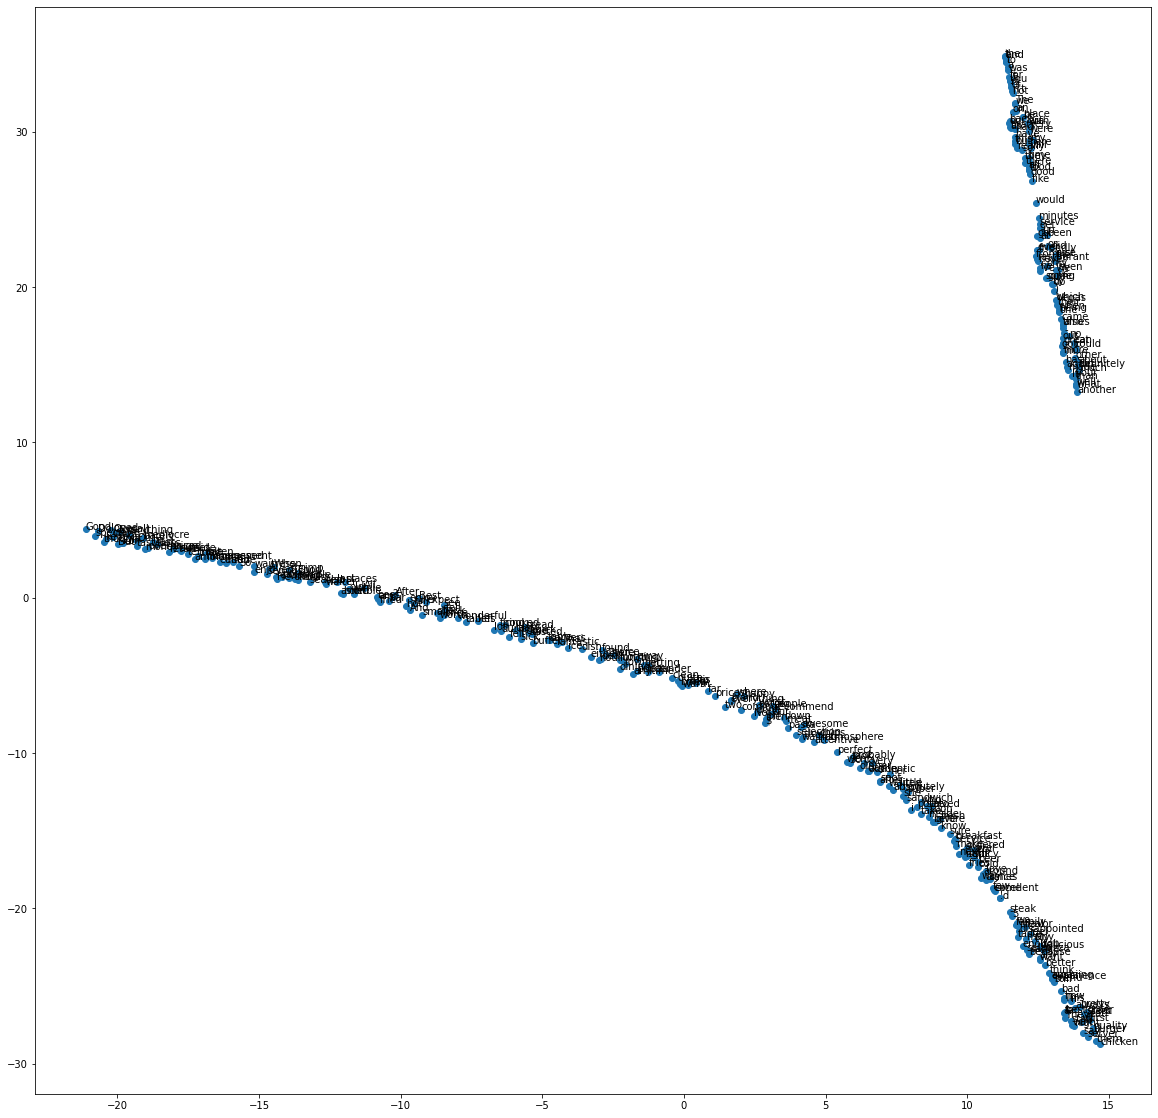

In [16]:
plt.figure(figsize=(20,20))

tsne = TSNE(n_components=2)
words = list(model.wv.vocab)
result = tsne.fit_transform(model[model.wv.vocab])
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
  plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

**<center>Skip Gram Model</center>**

In [17]:
model = Word2Vec(word_tokenized_corpus, sg=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


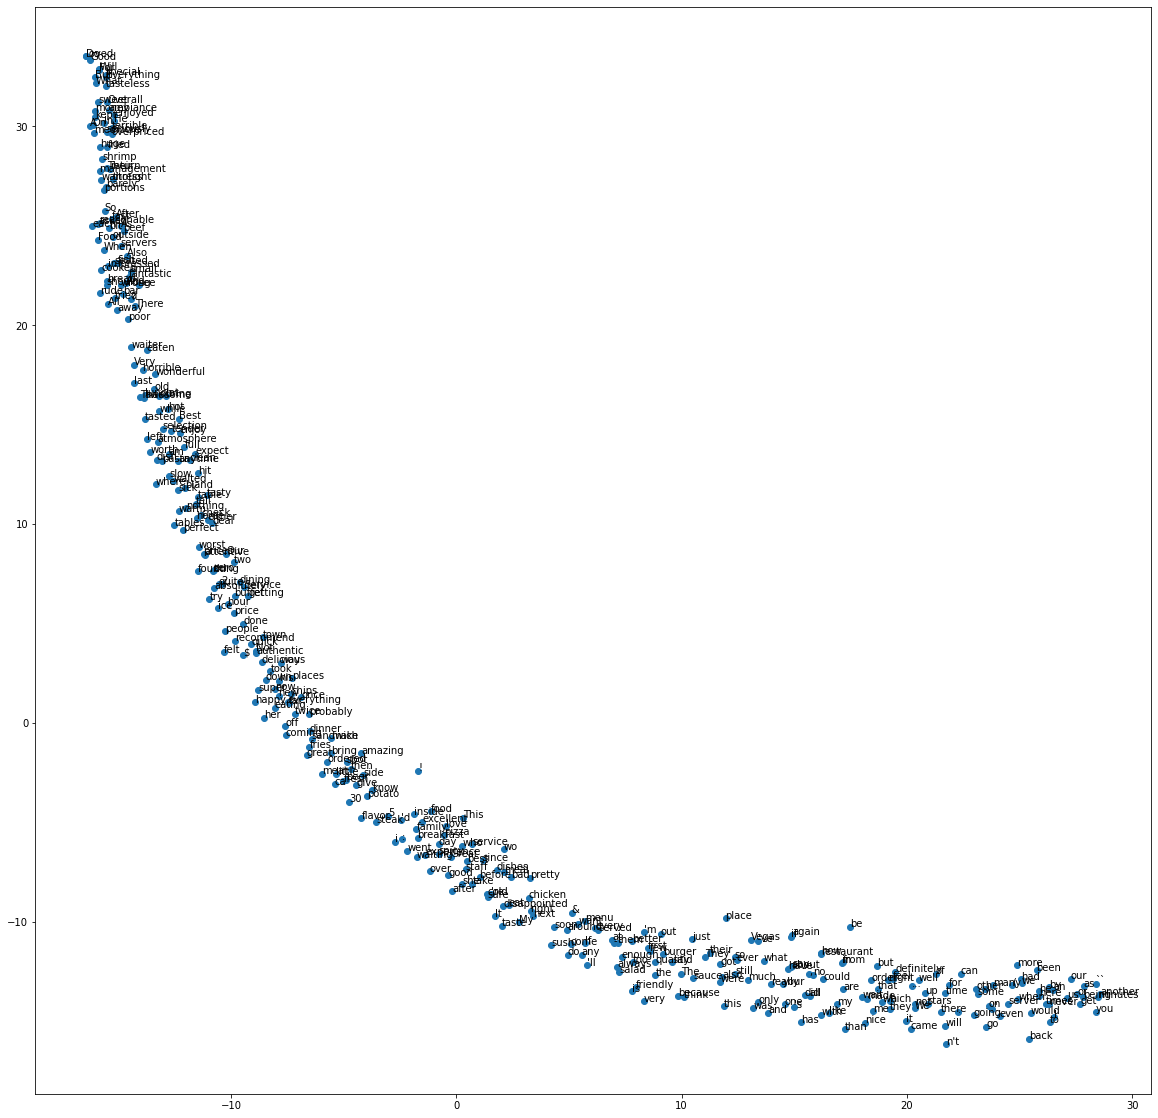

In [18]:
plt.figure(figsize=(20,20))

tsne = TSNE(n_components=2)
words = list(model.wv.vocab)
result = tsne.fit_transform(model[model.wv.vocab])
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
  plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

### GloVe Model

Like Word2Vec model, [GloVe](https://nlp.stanford.edu/projects/glove/) is also a petrained model, made available by the Stanford researchers. We first need to download the model and unizip it.

Import the necessary libraries

In [19]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

Now, we need to download the pre-trained word vectors for the GloVe model.

In [20]:
!wget "http://nlp.stanford.edu/data/glove.6B.zip"
!unzip glove.6B.zip

--2021-09-23 20:31:00--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-09-23 20:31:00--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-09-23 20:31:00--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

First, we need to convert the GloVe file format to the word2vec file
format. The only difference is the addition of a small header line.
This can be done by calling the glove2word2vec() function.

In [21]:
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

Lets try to test the parallelogram rule with this model.

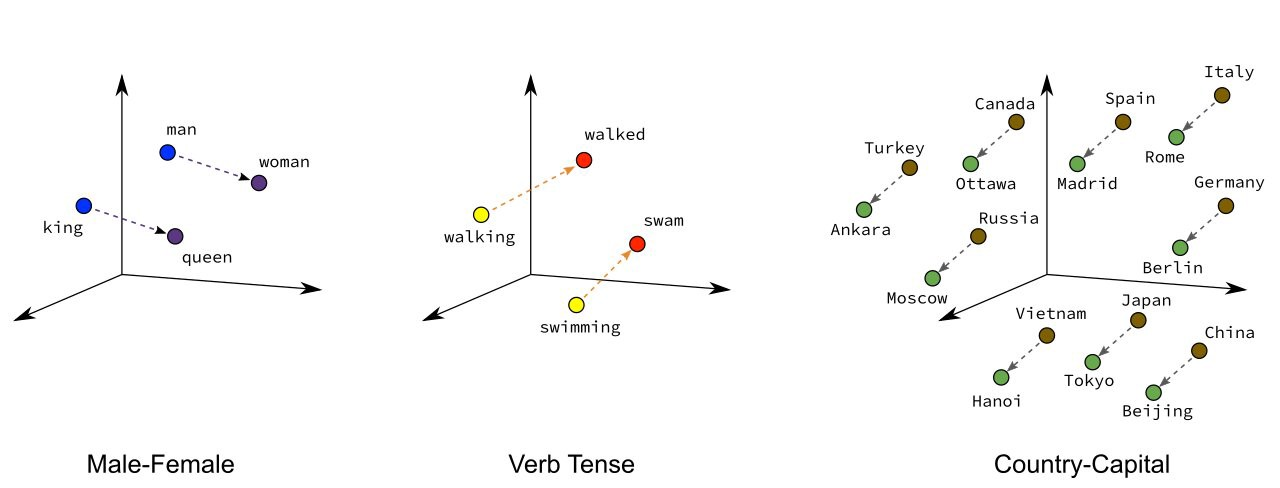

<center>Parallelogram Rule (source: https://miro.medium.com/max/2000/1*mWerYTuy9xH4SlRY9fFg1A.jpeg)</center>


The word 'man' is related to the word 'woman' in a similar way as king is related to 'queen'. On the other hand, 'man' and king are also related, as the both are of the same gender; similalry woman relates to queen. Now, a king is a man with richness and majesty, same goes for queen and woman. So, if you subtract man from king, you are left with the other characteristics (richness, majesty, etc.) and if you add woman to that you get 'queen'. This semantic structure is also shown by the word embeddings i.e. the vector represenation of the words as shown below.

In [22]:
# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7698541283607483)]
